<a href="https://colab.research.google.com/github/MarioBolanos/Modelado-y-Simulacion/blob/master/7_Complex_Systems/Rossler_Attractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib notebook

In [ ]:
import matplotlib.style
matplotlib.style.use('classic')
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp
import matplotlib.colors as colors
import matplotlib.cm as cmx

# Rössler Attractor

$\dot x = - y - z $

$\dot y = x + ay $

$\dot z = b + z(x - c)$

In [ ]:
def rossler_attractor(t, V):
    x = V[0]
    y = V[1]
    z = V[2]
    a = 0.1
    b = 0.1
    c = 9
    
    x_dot = - y - z
    y_dot = x + a*y
    z_dot = b + z*(x - c)
    
    V_dot =[x_dot, y_dot, z_dot]
    return V_dot

In [ ]:
jet = plt.get_cmap('magma') 
cNorm  = colors.Normalize(vmin=0, vmax=4)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
   

<IPython.core.display.Javascript object>


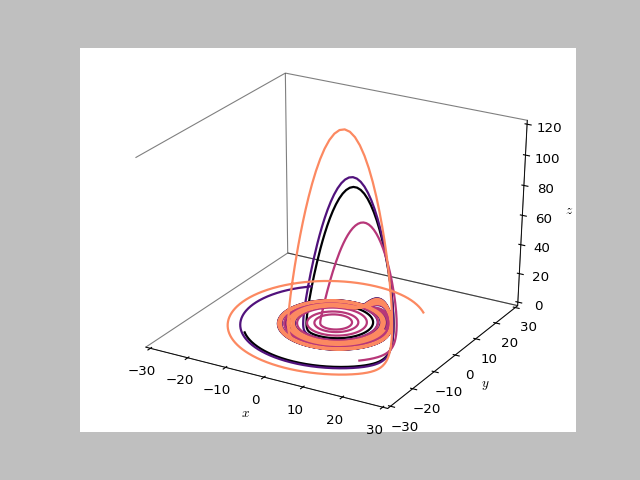

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Solve the ODE for different initial conditions and plot the trajectories in state space

idx= 0
for xi in np.linspace(-15,15, 2):
    for yi in np.linspace(-15,15,2):
        sol = solve_ivp(rossler_attractor, [0, 50], [xi, yi, 0.1], max_step = 1e-2)
        colorVal = scalarMap.to_rgba(idx)
        ax.plot(sol.y[0,:], sol.y[1,:], sol.y[2,:], color = colorVal, linewidth=2)
        idx = idx + 1
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.set_zlim([0, 120])
ax.set_xlim([-30, 30])
ax.set_ylim([-30, 30])
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('k')
ax.yaxis.pane.set_edgecolor('k')
ax.zaxis.pane.set_edgecolor('k')
ax.grid(False)
fig.show()

In [ ]:
def events_rossler(t, V):
    # Detect an event when the trajectory crosses the plane y = x
    impact = V[1]-V[0]
    return impact

<IPython.core.display.Javascript object>


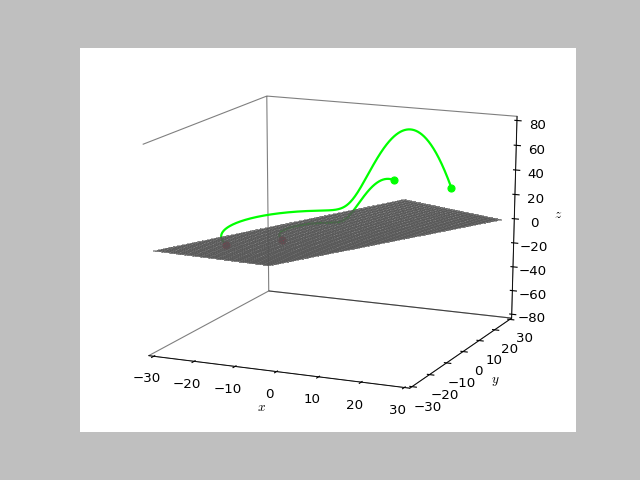

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
events_rossler.terminal = True # Stop simulation when the event is detected
events_rossler.direction = -1 # Detect the event from low to high

# Plot some trajectories:
initial_conds = [[20, 20, 30], [10, 10, 40]]

for ini in initial_conds: 
    sol = solve_ivp(rossler_attractor, [0, 50], ini, max_step = 1e-4, events = events_rossler)

    ax.scatter(sol.y[0,0], sol.y[1,0], sol.y[2,0], color = 'lime', s = 40)
    ax.scatter(sol.y[0,-1], sol.y[1,-1], sol.y[2,-1], color = 'crimson', s = 40)
    ax.plot(sol.y[0,:], sol.y[1,:], sol.y[2,:], color = 'lime', linewidth=2)

# Plot the plane y = x
normal = [-1, 1, 0]
xx, yy = np.meshgrid(range(-30,30), range(-30,30))
zz = -normal[0] * xx - normal[1] * yy

ax.plot_surface(xx, yy, zz, rstride=1, cstride=1, linewidth=0, antialiased=False, color = 'darkgray', alpha = 0.5)
ax.set_xlim([-30, 30])
ax.set_ylim([-30, 30])
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('k')
ax.yaxis.pane.set_edgecolor('k')
ax.zaxis.pane.set_edgecolor('k')
ax.grid(False)
fig.show()